In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [3]:
import_data = nfl.import_seasonal_data([2022])             
rb_season_data = pd.DataFrame(index = import_data.index)
rb_season_data["Player ID"] = import_data["player_id"]
rb_season_data["Carries"] = import_data["carries"]
rb_season_data["Rushing Yards"] = import_data["rushing_yards"]
rb_season_data["Rushing TDs"] = import_data["rushing_tds"]
rb_season_data["Fumbles"] = import_data["rushing_fumbles"]
rb_season_data["Fumbles Lost"] = import_data["rushing_fumbles_lost"]
rb_season_data["Rushing 1st Downs"] = import_data["rushing_first_downs"]
rb_season_data["Rushing EPA"] = import_data["rushing_epa"]
rb_season_data["Rushing 2Pt Conversions"] = import_data["rushing_2pt_conversions"]
rb_season_data["Games Played"] = import_data["games"]
rb_season_data

,Player ID,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,00-0019596,6,-4.0,0,1.0,1.0,0.0,-8.552574,0,4
1,00-0023459,8,9.0,0,1.0,1.0,1.0,-8.875749,0,4
2,00-0026143,9,12.0,0,2.0,1.0,3.0,-4.346008,0,4
3,00-0026158,3,6.0,0,0.0,0.0,1.0,-0.136921,0,3
4,00-0026498,6,10.0,0,0.0,0.0,2.0,-1.733140,0,4
...,...,...,...,...,...,...,...,...,...,...
430,00-0038120,38,178.0,1,0.0,0.0,9.0,4.051333,0,4
431,00-0038124,2,22.0,1,0.0,0.0,1.0,2.480654,0,3
432,00-0038128,4,16.0,0,1.0,1.0,1.0,-5.589098,0,1
433,00-0038129,0,0.0,0,0.0,0.0,0.0,0.000000,0,2


In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
rb_data = pd.DataFrame(index = import_weekly_data.index)
rb_data["Player"] = import_weekly_data["player_name"]
rb_data["Player ID"] = import_weekly_data["player_id"]
rb_data["Team"] = import_weekly_data["recent_team"]
rb_data["Player Full Name"] = import_weekly_data["player_display_name"]
rb_data = rb_data.drop_duplicates(subset=['Player Full Name'])
rb_data.loc[rb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
rb_merged_season_data = rb_data.merge(rb_season_data, left_on='Player ID', right_on='Player ID')
#rb_merged_season_data = rb_merged_season_data.loc[rb_merged_season_data["Attempts"] > 20, :]
rb_merged_season_data = rb_merged_season_data.drop(columns=["Player ID"])
rb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
219,K.Murray,ARI,Kyler Murray,24,91.0,2,1.0,0.0,8.0,4.426752,1,4
163,D.Williams,ARI,Darrel Williams,13,85.0,1,0.0,0.0,5.0,3.654924,0,3
310,E.Benjamin,ARI,Eno Benjamin,22,111.0,0,0.0,0.0,5.0,3.374988,0,4
118,J.Conner,ARI,James Conner,45,145.0,1,1.0,0.0,14.0,-0.272320,0,4
251,M.Brown,ARI,Marquise Brown,0,0.0,0,0.0,0.0,0.0,0.000000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
90,J.Williams,WAS,Jonathan Williams,6,54.0,0,0.0,0.0,3.0,2.900357,0,2
89,C.Wentz,WAS,Carson Wentz,12,62.0,0,0.0,0.0,2.0,4.514611,0,4
81,J.McKissic,WAS,J.D. McKissic,17,65.0,0,0.0,0.0,4.0,-4.609996,0,4
153,C.Sims,WAS,Cam Sims,0,0.0,0,0.0,0.0,0.0,0.000000,0,2


In [6]:
rb_data_ngs = pd.read_csv("../Resources/ngs_2022_rushing.csv")
rb_data_ngs = rb_data_ngs.loc[rb_data_ngs["week"] == 0, :]
rb_data_ngs = rb_data_ngs.sort_values(by=['team_abbr'])
rb_data_ngs = rb_data_ngs.drop_duplicates(subset=['player_display_name'])
rb_data_full = rb_data_ngs.merge(rb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
rb_data_full = rb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "Player Full Name", "Team", "Carries",
                                           "Rushing Yards", "Rushing TDs", "week"])
rb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played'],
      dtype='object')

In [7]:
rb_data_full

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,rush_touchdowns,player_gsis_id,player_short_name,Player,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,James Conner,RB,ARI,4.661655,17.777778,2.564000,45,145,168.035662,-26.035662,...,1,00-0033553,J.Conner,J.Conner,1.0,0.0,14.0,-0.272320,0,4
1,Eno Benjamin,RB,ARI,3.493784,9.090909,2.962619,22,111,96.087966,14.912034,...,0,00-0036383,E.Benjamin,E.Benjamin,0.0,0.0,5.0,3.374988,0,4
2,Cordarrelle Patterson,RB,ATL,3.344147,22.413793,2.814407,58,340,268.306553,67.693447,...,3,00-0030578,C.Patterson,C.Patterson,0.0,0.0,19.0,4.922390,0,4
3,Tyler Allgeier,RB,ATL,3.249496,15.384615,2.738231,26,139,99.741454,-2.741454,...,0,00-0037263,T.Allgeier,T.Allgeier,0.0,0.0,4.0,-1.201528,0,3
4,J.K. Dobbins,RB,BAL,4.646250,15.000000,2.929118,20,64,80.926693,-16.926693,...,1,00-0036158,J.Dobbins,J.Dobbins,0.0,0.0,5.0,-1.900245,0,2
5,Devin Singletary,RB,BUF,3.787674,20.588235,2.783607,34,129,141.636699,-12.636699,...,0,00-0035250,D.Singletary,D.Singletary,1.0,1.0,6.0,-9.333976,0,4
6,Christian McCaffrey,RB,CAR,3.306741,17.241379,2.687741,58,270,267.134561,-0.134561,...,1,00-0033280,C.McCaffrey,C.McCaffrey,0.0,0.0,15.0,1.158200,0,4
7,David Montgomery,RB,CHI,3.777925,22.857143,2.969219,35,159,129.449699,29.550301,...,0,00-0035685,D.Montgomery,D.Montgomery,0.0,0.0,6.0,-5.515701,0,3
8,Khalil Herbert,RB,CHI,2.795710,17.307692,2.673000,52,317,211.113913,100.886087,...,3,00-0036906,K.Herbert,K.Herbert,0.0,0.0,14.0,6.087634,0,4
9,Joe Mixon,RB,CIN,5.486964,20.731707,2.742438,82,224,273.669256,-60.669256,...,1,00-0033897,J.Mixon,J.Mixon,0.0,0.0,10.0,-21.681784,0,4


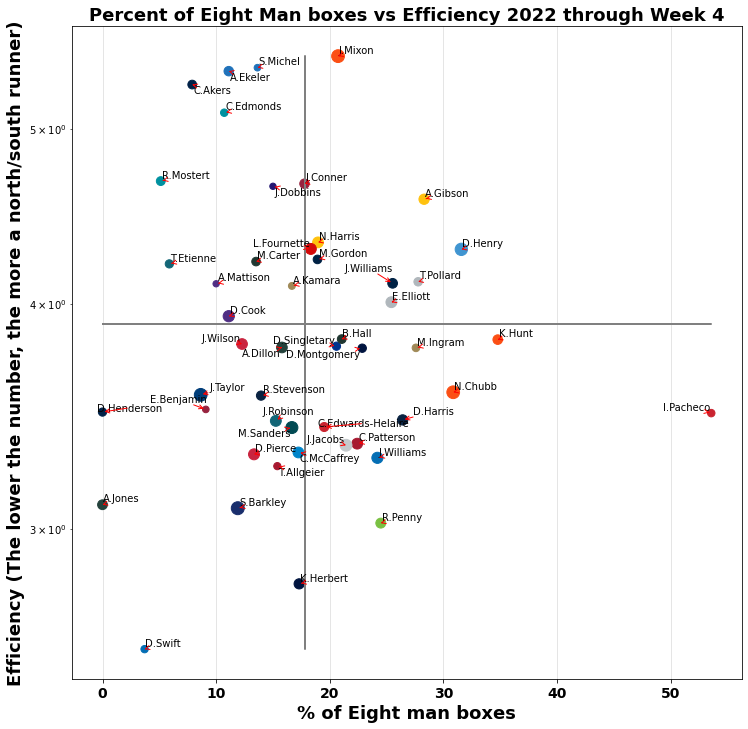

In [8]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "efficiency", "team_abbr",
                         "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["efficiency"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Efficiency (The lower the number, the more a north/south runner)', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Efficiency 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

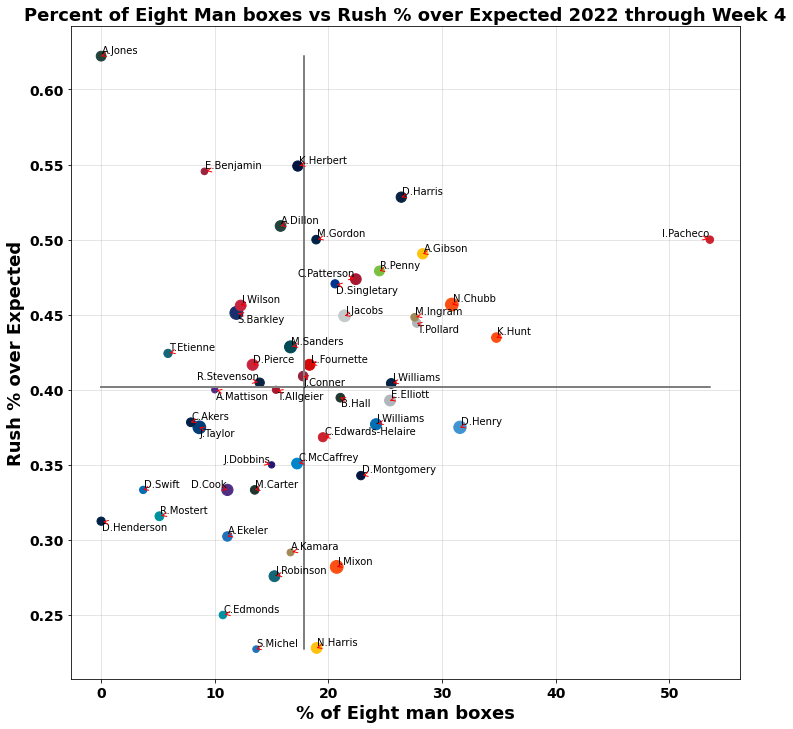

In [9]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "rush_pct_over_expected",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["rush_pct_over_expected"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush % over Expected', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush % over Expected 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

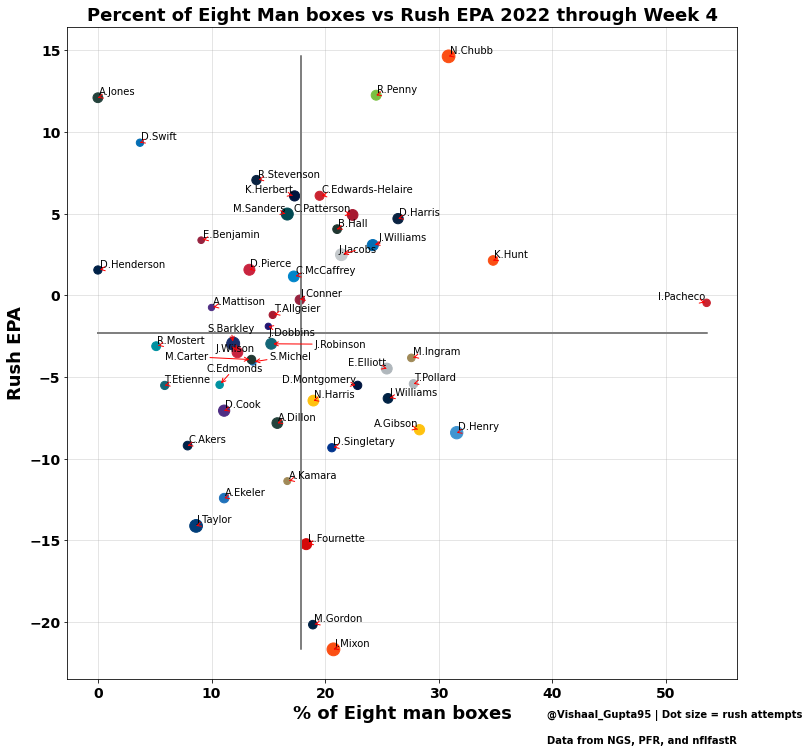

In [17]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "Rushing EPA",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["Rushing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush EPA 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.figtext(.68, .08, '@Vishaal_Gupta95 | Dot size = rush attempts', fontsize=10, fontweight = "bold")
plt.figtext(.68, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")

plt.savefig('Images/Per8Man_vs_RushEPA', dpi=400)
plt.show()

In [11]:
rb_data_pfr = pd.read_csv("../Resources/advstats_season_rush.csv")
rb_data_pfr = rb_data_pfr.loc[rb_data_pfr["season"] == 2022, :]
rb_data_pfr = rb_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "att", "yds",
                                       "x1d", "loaded"])
rb_data_pfr.loc[rb_data_pfr["player"] == "AJ Dillon", "player"] = "A.J. Dillon"
rb_data_pfr.loc[rb_data_pfr["player"] == "Jeff Wilson", "player"] = "Jeffery Wilson"
rb_data_all = rb_data_full.merge(rb_data_pfr, left_on='player_display_name', right_on='player')
rb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played', 'player', 'g', 'ybc',
       'ybc_att', 'yac', 'yac_att', 'brk_tkl', 'att_br'],
      dtype='object')

In [12]:
rb_data_all

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,Rushing 2Pt Conversions,Games Played,player,g,ybc,ybc_att,yac,yac_att,brk_tkl,att_br
0,James Conner,RB,ARI,4.661655,17.777778,2.564000,45,145,168.035662,-26.035662,...,0,4,James Conner,4,95,2.1,50,1.1,1,45.0
1,Eno Benjamin,RB,ARI,3.493784,9.090909,2.962619,22,111,96.087966,14.912034,...,0,4,Eno Benjamin,4,76,3.5,35,1.6,2,11.0
2,Cordarrelle Patterson,RB,ATL,3.344147,22.413793,2.814407,58,340,268.306553,67.693447,...,0,4,Cordarrelle Patterson,4,206,3.6,134,2.3,0,NaN
3,Tyler Allgeier,RB,ATL,3.249496,15.384615,2.738231,26,139,99.741454,-2.741454,...,0,3,Tyler Allgeier,3,80,3.1,59,2.3,0,NaN
4,J.K. Dobbins,RB,BAL,4.646250,15.000000,2.929118,20,64,80.926693,-16.926693,...,0,2,J.K. Dobbins,2,26,1.3,38,1.9,1,20.0
5,Devin Singletary,RB,BUF,3.787674,20.588235,2.783607,34,129,141.636699,-12.636699,...,0,4,Devin Singletary,4,73,2.1,56,1.6,1,34.0
6,Christian McCaffrey,RB,CAR,3.306741,17.241379,2.687741,58,270,267.134561,-0.134561,...,0,4,Christian McCaffrey,4,140,2.4,130,2.2,1,58.0
7,David Montgomery,RB,CHI,3.777925,22.857143,2.969219,35,159,129.449699,29.550301,...,0,3,David Montgomery,3,61,1.7,98,2.8,8,4.4
8,Khalil Herbert,RB,CHI,2.795710,17.307692,2.673000,52,317,211.113913,100.886087,...,0,4,Khalil Herbert,4,192,3.7,125,2.4,5,10.4
9,Joe Mixon,RB,CIN,5.486964,20.731707,2.742438,82,224,273.669256,-60.669256,...,0,4,Joe Mixon,4,161,2.0,63,0.8,2,41.0


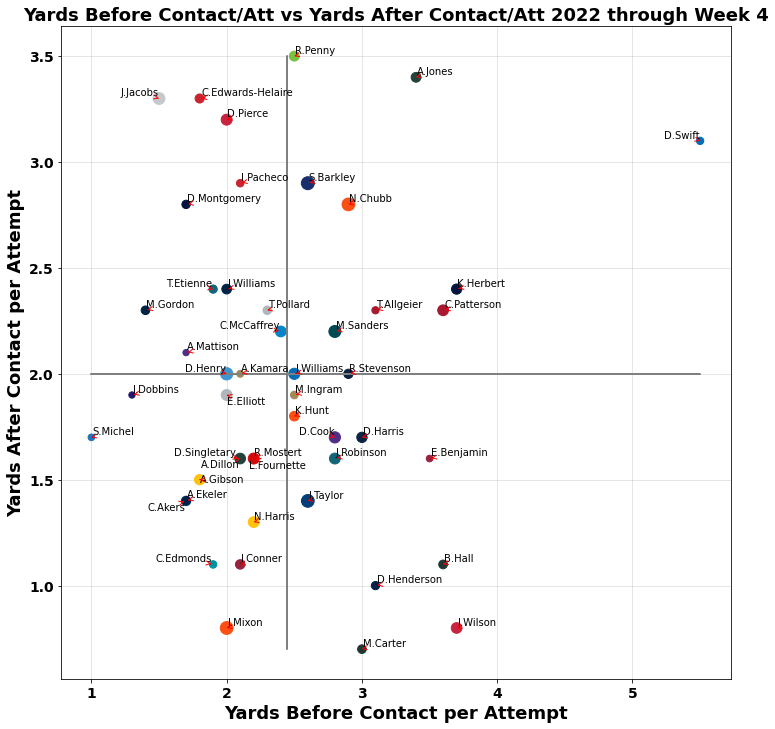

In [13]:
rb_graph = rb_data_all[["player_short_name", "ybc_att", "yac_att", "team_abbr", "rush_attempts"]]

x = rb_graph["ybc_att"]
y = rb_graph["yac_att"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s*2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Contact per Attempt', fontsize=18, fontweight = "bold")
plt.ylabel('Yards After Contact per Attempt', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Contact/Att vs Yards After Contact/Att 2022 through Week 4', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgYBC_vs_AvgYAC', dpi=400)
plt.show()